Project NLP Kelompok 3 (Ringkasan Artikel Berita)

Ketua   : Rezki Andika      (42622045) \n
Anggota : Muh Faiz Fajar M  (42622043)
          Muh Rifai Rahim   (42622044)
          Juliana Sari      (42622046)
          Muhammad Fadhel   (42622047)
          Nur Aqilah Hirman (42622048)

In [1]:
!pip install torch
!pip install datasets
!pip install rouge
!pip install transformers[torch]
!pip install accelerate -U
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

# Import Library

In [2]:
from google.colab import drive
import os
from datasets import load_dataset, Dataset
from transformers import BertTokenizer
import torch
from transformers import BertModel, GPT2LMHeadModel, GPT2Config, EncoderDecoderModel
from torch.utils.data import DataLoader
from transformers import Trainer
from transformers import TrainingArguments
from transformers import EncoderDecoderModel, BertTokenizer, Trainer, TrainingArguments
import datasets
from transformers import pipeline
from rouge import Rouge
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import concatenate_datasets
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import json
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Load Dataset

In [ ]:
def extract_tar_gz(file_path):
    os.system(f'tar -xvf {file_path}')
extract_tar_gz('/content/drive/MyDrive/liputan6_data.tar.gz')

In [ ]:
data_dir = "/content/liputan6_data"

dataset = load_dataset("id_liputan6", 'canonical', data_dir=data_dir)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

id_liputan6.py:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

The repository for id_liputan6 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/id_liputan6.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating validation split:   0%|          | 0/10972 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10972 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/193883 [00:00<?, ? examples/s]

In [ ]:
full_dataset = concatenate_datasets([dataset['train'], dataset['test']])
df = full_dataset.to_pandas()

# Panjang Artikel

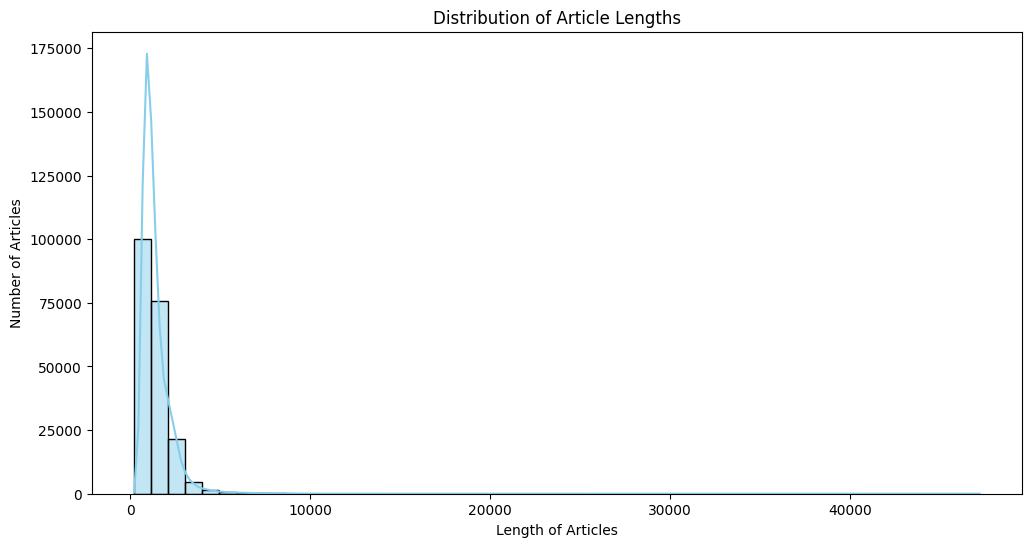

In [ ]:
plt.figure(figsize=(12, 6))
article_lengths = df['clean_article'].str.len()
sns.histplot(article_lengths, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Article Lengths')
plt.xlabel('Length of Articles')
plt.ylabel('Number of Articles')
plt.show()

## Summary Lengths

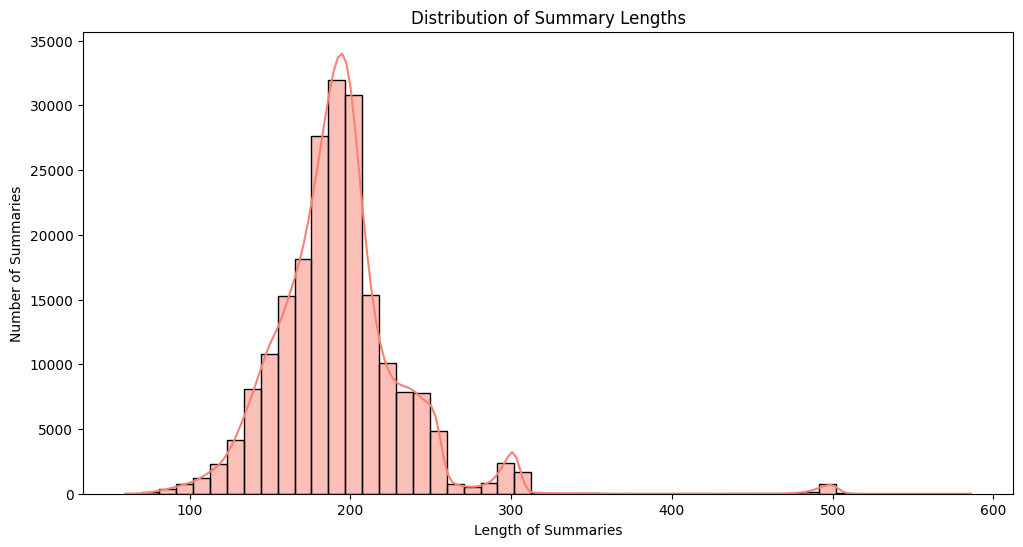

In [ ]:
plt.figure(figsize=(12, 6))
summary_lengths = df['clean_summary'].str.len()
sns.histplot(summary_lengths, bins=50, kde=True, color='salmon')
plt.title('Distribution of Summary Lengths')
plt.xlabel('Length of Summaries')
plt.ylabel('Number of Summaries')
plt.show()

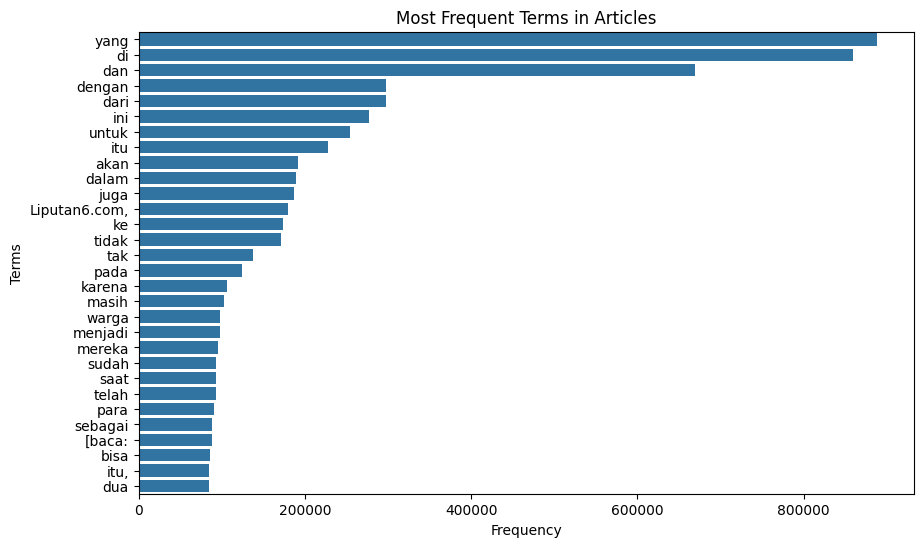

In [ ]:
def plot_most_frequent_terms(text_series, title, n=30):
    all_words = ' '.join(text_series).split()
    freq_dist = Counter(all_words)
    common_words = freq_dist.most_common(n)

    words = [word[0] for word in common_words]
    counts = [word[1] for word in common_words]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=words)
    plt.title(f'Most Frequent Terms in {title}')
    plt.xlabel('Frequency')
    plt.ylabel('Terms')
    plt.show()
plot_most_frequent_terms(df['clean_article'].dropna(), 'Articles')

## Most Frequent Terms in Summaries

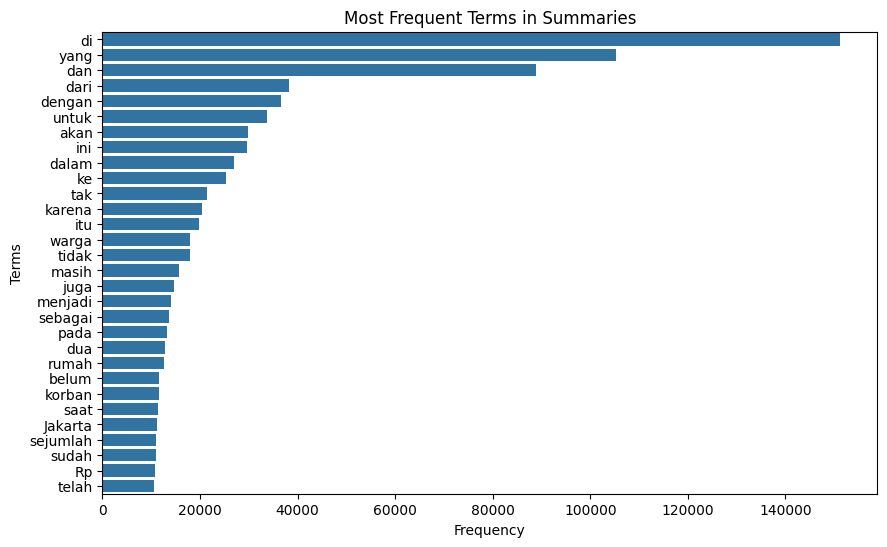

In [ ]:
plot_most_frequent_terms(df['clean_summary'].dropna(), 'Summaries')

## Scatter Plot for Article vs Summary Length

In [ ]:
article_lengths = df['clean_article'].dropna().apply(len)
summary_lengths = df['clean_summary'].dropna().apply(len)

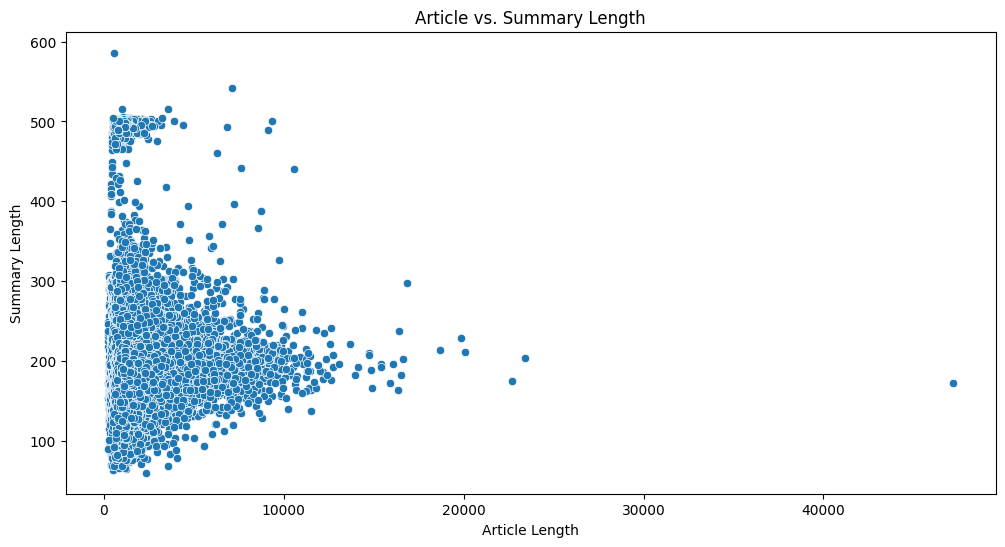

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=article_lengths, y=summary_lengths)
plt.title('Article vs. Summary Length')
plt.xlabel('Article Length')
plt.ylabel('Summary Length')
plt.show()

## Box Plot Distribusi Panjang Teks

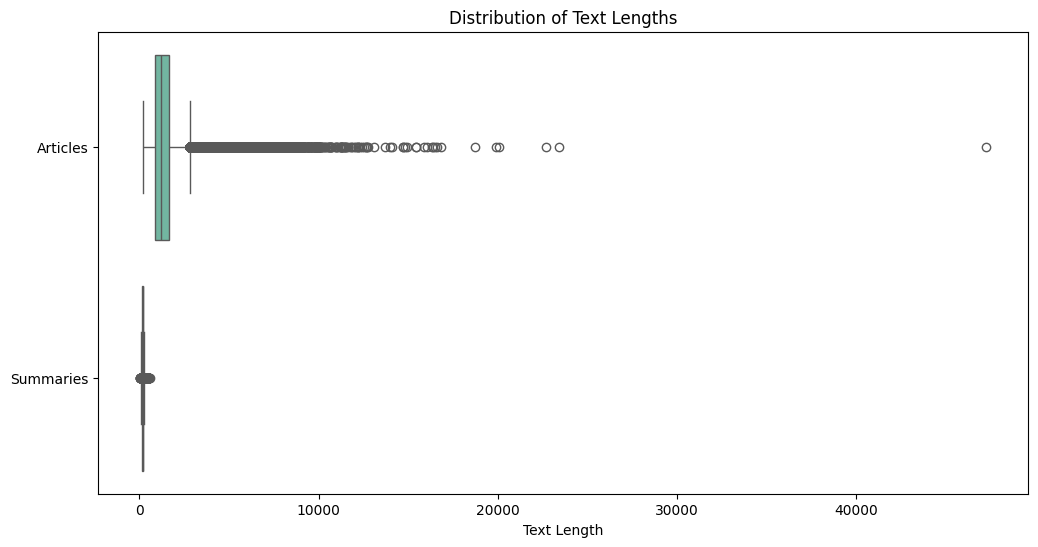

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=[article_lengths, summary_lengths], orient='h', palette="Set2")
plt.yticks(ticks=[0, 1], labels=['Articles', 'Summaries'])
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.show()

## Plot pasangan dua kata yang muncul berurutan dalam sebuah teks

In [ ]:
def plot_ngrams(text_series, ngram_range, n=20, title="Top N-grams"):
    count_vect = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(text_series)
    ngrams = count_vect.transform(text_series)
    sum_ngrams = ngrams.sum(axis=0)
    ngram_freq = [(ngram, sum_ngrams[0, idx]) for ngram, idx in count_vect.vocabulary_.items()]
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:n]

    df_ngrams = pd.DataFrame(ngram_freq, columns=['ngram', 'frequency'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='frequency', y='ngram', data=df_ngrams)
    plt.title(title)
    plt.show()

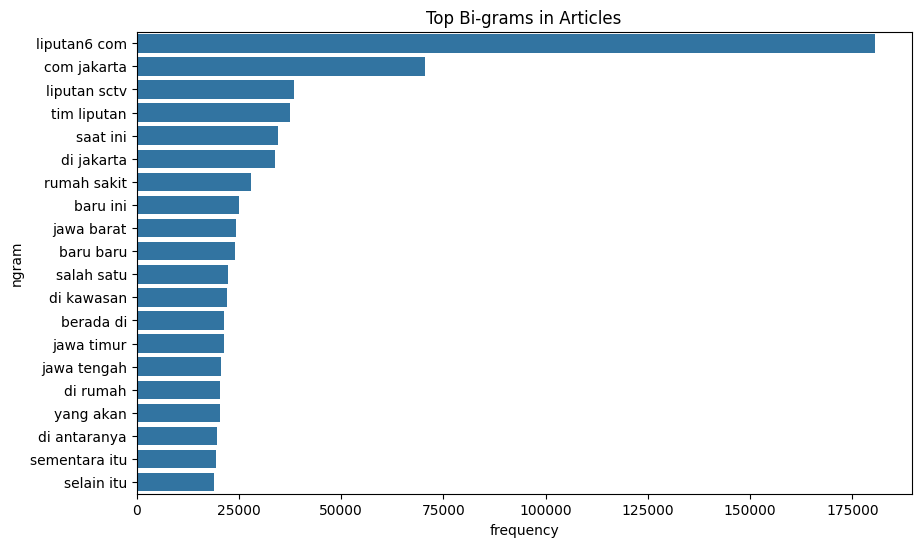

In [ ]:
plot_ngrams(df['clean_article'].dropna(), (2,2), title="Top Bi-grams in Articles")

## Plotting Bi-grams Summaries

In [ ]:
def plot_ngrams_summaries(text_series, ngram_range, n=20, title="Top N-grams in Summaries"):
    count_vect = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(text_series)
    ngrams = count_vect.transform(text_series)
    sum_ngrams = ngrams.sum(axis=0)
    ngram_freq = [(ngram, sum_ngrams[0, idx]) for ngram, idx in count_vect.vocabulary_.items()]
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:n]

    df_ngrams = pd.DataFrame(ngram_freq, columns=['ngram', 'frequency'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='frequency', y='ngram', data=df_ngrams)
    plt.title(title)
    plt.show()

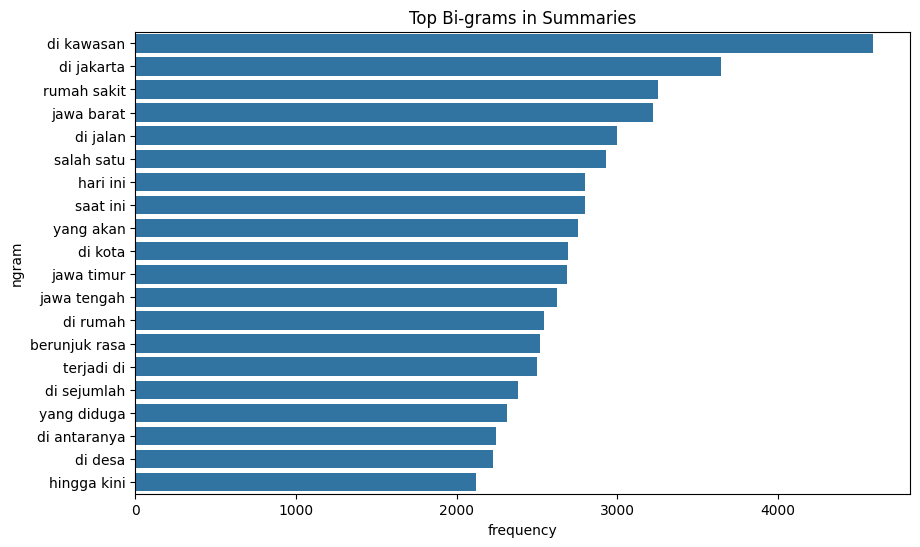

In [ ]:
plot_ngrams_summaries(df['clean_summary'].dropna(), (2,2), title="Top Bi-grams in Summaries")

## Plotting tiga kata yg mncl berurutan 

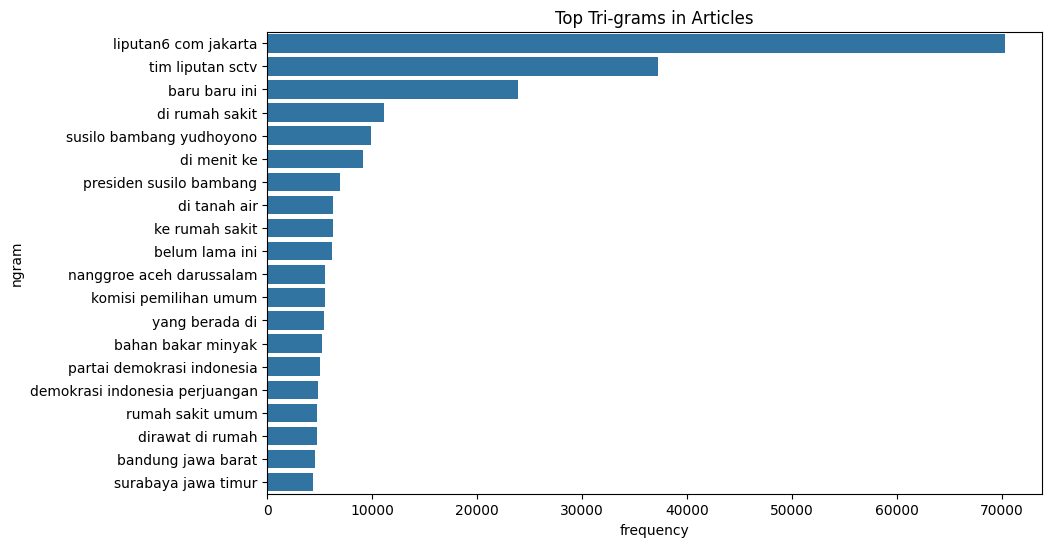

In [ ]:
plot_ngrams(df['clean_article'].dropna(), (3,3), title="Top Tri-grams in Articles")

## Plotting Tri-grams Summaries

In [ ]:
def plot_ngrams_summaries_trigrams(text_series, ngram_range, n=20, title="Top N-grams in Summaries"):
    count_vect = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(text_series)
    ngrams = count_vect.transform(text_series)
    sum_ngrams = ngrams.sum(axis=0)
    ngram_freq = [(ngram, sum_ngrams[0, idx]) for ngram, idx in count_vect.vocabulary_.items()]
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:n]

    df_ngrams = pd.DataFrame(ngram_freq, columns=['ngram', 'frequency'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='frequency', y='ngram', data=df_ngrams)
    plt.title(title)
    plt.show()


# Preprocessing

Splitting Dataset

In [ ]:
dataset = dataset['train'].train_test_split(test_size=0.2)

train_dataset = dataset['train']
val_dataset = dataset['test']
trust_remote_code=True

## Tokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained("cahya/bert2gpt-indonesian-summarization")
tokenizer.bos_token = tokenizer.cls_token
tokenizer.eos_token = tokenizer.sep_token

tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.26k [00:00<?, ?B/s]

## Defining the Maximum Length of the Input and Target Sequences

In [ ]:
max_input_length = 256
max_target_length = 256

## Melakukan Tokenizing Artikel

In [ ]:
def preprocess_function(examples):
    articles = examples['clean_article']
    summaries = examples['clean_summary']

    inputs = [tokenizer.encode_plus(article, truncation=True, max_length=max_input_length, padding='max_length') for article in articles]
    targets = [tokenizer.encode_plus(summary, truncation=True, max_length=max_target_length, padding='max_length') for summary in summaries]

    input_ids = [input_['input_ids'] for input_ in inputs]
    attention_masks = [input_['attention_mask'] for input_ in inputs]
    labels = [target['input_ids'] for target in targets]
    decoder_input_ids = [[tokenizer.cls_token_id] + target['input_ids'][:-1] for target in targets]

    return {'input_ids': input_ids, 'attention_mask': attention_masks, 'labels': labels, 'decoder_input_ids': decoder_input_ids}

## Train dan Validasi Dataset

In [ ]:
train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/155106 [00:00<?, ? examples/s]

Map:   0%|          | 0/38777 [00:00<?, ? examples/s]

## Print Processed Examples from the Training Dataset

In [ ]:
for i in range(3):
    print(f"Example {i+1}:")
    print("input_ids:", train_dataset[i]['input_ids'])
    print("attention_mask:", train_dataset[i]['attention_mask'])
    print("labels:", train_dataset[i]['labels'])
    print("decoder_input_ids:", train_dataset[i]['decoder_input_ids'])
    print("\n")

Example 1:
input_ids: [3, 17715, 1050, 17, 3036, 15, 12417, 29, 10729, 27103, 1007, 5000, 1600, 3162, 23443, 5662, 11358, 3924, 1766, 11, 8182, 1896, 12, 2876, 3902, 19695, 1009, 19240, 31557, 17, 3290, 19117, 1510, 5149, 1570, 10604, 8970, 1896, 2309, 11, 23629, 16735, 1499, 12, 8182, 1896, 1510, 6187, 1495, 12417, 15, 6704, 15, 2762, 1503, 11, 2420, 18, 20, 12, 17, 10729, 1510, 1609, 2788, 5374, 1844, 15, 2466, 1619, 2113, 23443, 8182, 1896, 1509, 11987, 4356, 1900, 1538, 1600, 3162, 23443, 1566, 3922, 30834, 3215, 3001, 3402, 5761, 2779, 17, 8126, 20290, 1600, 3162, 23443, 15, 10729, 2847, 8387, 23629, 16735, 1499, 8182, 1896, 1510, 1720, 3597, 1533, 2397, 16, 2420, 2772, 2876, 17, 6781, 23629, 16735, 1499, 1684, 3224, 2321, 13207, 1510, 2412, 2410, 1570, 15424, 6784, 1509, 9872, 8764, 2977, 17, 11, 14537, 18, 1885, 12, 17, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

## Print Processed Examples from Validation Dataset

In [ ]:
for i in range(3):
    print(f"Example {i+1}:")
    print("input_ids:", val_dataset[i]['input_ids'])
    print("attention_mask:", val_dataset[i]['attention_mask'])
    print("labels:", val_dataset[i]['labels'])
    print("decoder_input_ids:", val_dataset[i]['decoder_input_ids'])
    print("\n")

Example 1:
input_ids: [3, 17715, 1050, 17, 3036, 15, 6760, 29, 5333, 4798, 11023, 9428, 4843, 2886, 4870, 4300, 3144, 6715, 1495, 2878, 2042, 1495, 2443, 2054, 17, 8705, 1695, 4272, 1509, 9638, 29, 7122, 1507, 9428, 4843, 21448, 17, 3290, 2577, 7207, 2907, 1487, 12369, 1495, 1788, 2042, 15, 12915, 11, 2270, 18, 22, 12, 2079, 5690, 1966, 7366, 1994, 17, 1495, 6760, 15, 4468, 2086, 15, 4124, 2485, 4988, 9800, 21450, 5851, 17, 4798, 1510, 19833, 11012, 4124, 2638, 10998, 8766, 2485, 4988, 1600, 19893, 1533, 6190, 2357, 1510, 2165, 23495, 2229, 8705, 4124, 1509, 17201, 6084, 1494, 17, 4798, 1542, 1609, 4428, 16383, 1741, 15, 2756, 23856, 3085, 8288, 1494, 17, 11023, 9428, 21448, 7655, 2135, 1592, 4124, 1509, 5639, 1495, 5147, 15, 2326, 2341, 17, 1695, 17910, 4798, 1495, 28063, 20371, 3691, 1028, 17, 8597, 4693, 2841, 7300, 1530, 15, 20595, 1817, 6794, 24077, 1555, 11881, 1507, 3342, 16, 3342, 12109, 1510, 1720, 17182, 17, 8602, 5510, 4063, 2135, 1495, 4583, 15, 3596, 2070, 17, 1495, 3974, 

## Print The Length of Training and Validation Dataset

In [ ]:
print(f"Length of Training Dataset: {len(train_dataset)}")
print(f"Length of Validation Dataset: {len(val_dataset)}")

Length of Training Dataset: 155106
Length of Validation Dataset: 38777


## Print The First Element of Training and Validation Dataset

In [ ]:
print(f"First Element of Training Dataset: {train_dataset[0]}")
print(f"First Element of Validation Dataset: {val_dataset[0]}")

First Element of Training Dataset: {'id': '186339', 'url': 'https://www.liputan6.com/news/read/186339/hatta-rajasa-ketua-presidium-icmi', 'clean_article': 'Liputan6.com, Pekanbaru: Hatta Rajasa ditetapkan sebagai Ketua Presidium Ikatan Cendekiawan Muslim Indonesia (ICMI) 2008 menggantikan Nanat Fatah Natsir. Demikian ketetapan yang dihasilkan dalam Silaturahmi Nasional (Silaknas) ICMI yang ditutup di Pekanbaru, Riau, Ahad (13/1). Hatta yang juga Menteri Sekretaris Negara, sebelumnya merupakan anggota Presidium ICMI dan pengukuhannya sebagai Ketua Presidium adalah penggiliran sesuai periode jabatan setahun sekali. Usai dikukuhkan sebagai Ketua Presidium, Hatta langsung menutup Silaknas ICMI yang telah berlangsung dari 11-13 Januari 2008. Adapun Silaknas tersebut menghasilkan 17 rekomendasi yang harus dilakukan dalam menegakkan demokrasi dan mewujudkan kesejahteraan rakyat. (ANS/Antara).', 'clean_summary': 'Hatta Rajasa ditetapkan sebagai Ketua Presidium Ikatan Cendekiawan Muslim Indones

In [ ]:
bert_model = BertModel.from_pretrained("cahya/bert-base-indonesian-1.5G")

config.json:   0%|          | 0.00/468 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

In [ ]:
gpt2_config = GPT2Config.from_pretrained("cahya/gpt2-small-indonesian-522M", add_cross_attention=True)

config.json:   0%|          | 0.00/573 [00:00<?, ?B/s]

# Create Model

In [ ]:
gpt2_model = GPT2LMHeadModel(gpt2_config)

In [ ]:
model = EncoderDecoderModel(encoder=bert_model, decoder=gpt2_model)

In [ ]:
model.config.decoder_start_token_id = tokenizer.cls_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.config.eos_token_id = tokenizer.sep_token_id

In [ ]:
if torch.cuda.is_available():
    print("GPU is available")
else:
    print("GPU is not available, using CPU instead")

GPU is available


# Training Model

In [ ]:
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/results",  
    max_steps=40000,  
    per_device_train_batch_size=4,  
    per_device_eval_batch_size=4,  
    warmup_steps=500,  
    weight_decay=0.01,  
    logging_dir='/content/drive/MyDrive/logs',  
    logging_steps=10,
)

In [ ]:
trainer = Trainer(
    model=model, 
    args=training_args,  
    train_dataset=train_dataset,  
    eval_dataset=val_dataset,  )

In [ ]:

trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: buatusbk (buatusbk-ujung-pandang) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.11/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:651: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


Step,Training Loss
10,9.382400
20,5.232800
30,2.191300
40,1.711500
50,1.582600
60,1.522700
70,1.465600
80,1.347900
90,1.297300
100,1.372300


/usr/local/lib/python3.11/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:651: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)
/usr/local/lib/python3.11/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:651: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no 

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Continue Training

In [ ]:
model_path = "/content/drive/MyDrive/results/checkpoint-28k-steps"
model = EncoderDecoderModel.from_pretrained(model_path)
tokenizer = BertTokenizer.from_pretrained("cahya/bert2gpt-indonesian-summarization")

In [ ]:
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/results",
    max_steps=30000,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='/content/drive/MyDrive/logs',
    logging_steps=10,
    resume_from_checkpoint=model_path,  # Ensure training resumes from the checkpoint
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:639: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


Step,Training Loss
10,0.314000
20,0.281500
30,0.346600
40,0.298500
50,0.344800
60,0.306400
70,0.316100
80,0.314200
90,0.265000
100,0.313000


Removed shared tensor {'decoder.lm_head.weight'} while saving. This should be OK, but check by verifying that you don't receive any warning while reloading
/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:639: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)
/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:639: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may ob

Step,Training Loss
10,0.314000
20,0.281500
30,0.346600
40,0.298500
50,0.344800
60,0.306400
70,0.316100
80,0.314200
90,0.265000
100,0.313000


/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:639: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


## Val Loss and Training Loss

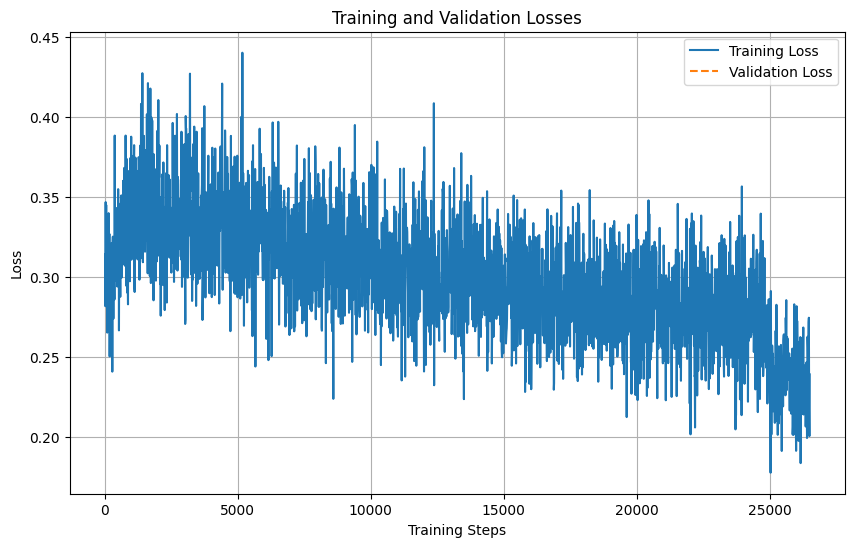

In [ ]:
trainer_state_path = '/content/drive/MyDrive/results/186k-steps-model/trainer_state.json'
with open(trainer_state_path, 'r') as file:
    trainer_state = json.load(file)

train_losses, val_losses, steps = [], [], []

for log in trainer_state['log_history']:
    if 'loss' in log:  
        train_losses.append(log['loss'])
        steps.append(log['step'])
    if 'eval_loss' in log: 
        val_losses.append(log['eval_loss'])


val_steps = [log['step'] for log in trainer_state['log_history'] if 'eval_loss' in log]

plt.figure(figsize=(10, 6))
plt.plot(steps, train_losses, label='Training Loss')
plt.plot(val_steps, val_losses, label='Validation Loss', linestyle='--')
plt.title('Training and Validation Losses')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate Model

## Rouge Score

In [ ]:
model_path = "/content/drive/MyDrive/results/186k-steps-model"
model = EncoderDecoderModel.from_pretrained(model_path)
tokenizer = BertTokenizer.from_pretrained("cahya/bert2gpt-indonesian-summarization")


summarizer = pipeline("summarization", model=model, tokenizer=tokenizer)

rouge = Rouge()


articles = [
    "Jakarta - Presiden Joko Widodo hari ini mengumumkan rencana besar untuk pembangunan infrastruktur baru di pulau Bali. Proyek ambisius ini, yang mencakup pembangunan jalan raya, jembatan, dan fasilitas umum, diharapkan dapat memberikan dorongan signifikan untuk industri pariwisata yang telah lama menjadi tulang punggung ekonomi Bali. Pembangunan ini juga bertujuan untuk meningkatkan kualitas hidup masyarakat lokal dengan menciptakan lebih banyak lapangan kerja dan memperbaiki akses transportasi di pulau tersebut.",
    "Bandung - Sebuah tim peneliti dari Institut Teknologi Bandung (ITB) baru-baru ini berhasil mengembangkan teknologi baru dalam pengolahan limbah yang lebih ramah lingkungan. Teknologi ini, yang menggunakan proses biologis untuk mengurai limbah industri, diharapkan dapat secara signifikan mengurangi polusi air dan udara di sekitar area industri. Para peneliti berharap bahwa penemuan mereka dapat diadopsi oleh pabrik-pabrik di Indonesia untuk membantu menjaga kelestarian lingkungan.",
    "Yogyakarta - Festival budaya tahunan yang diselenggarakan di Yogyakarta berhasil menarik perhatian ribuan pengunjung dari berbagai daerah. Festival ini menampilkan berbagai pertunjukan seni tradisional, pameran kerajinan tangan, dan tentunya beragam jenis kuliner lokal. Acara ini tidak hanya menjadi ajang untuk melestarikan budaya, tetapi juga sebagai sarana untuk mempromosikan pariwisata di Yogyakarta.",
    "Surabaya - Dalam upaya untuk meningkatkan kualitas udara dan memerangi perubahan iklim, pemerintah kota Surabaya baru-baru ini meluncurkan program penghijauan skala besar. Program ini melibatkan penanaman ribuan pohon di seluruh kota dan kampanye edukasi lingkungan untuk mendorong warga kota untuk berpartisipasi aktif. Wali Kota Surabaya mengatakan bahwa inisiatif ini adalah langkah penting dalam upaya kota untuk menjadi lebih hijau dan berkelanjutan.",
    "Medan - Sebuah kompetisi startup digital yang diselenggarakan di kota Medan baru-baru ini menunjukkan potensi besar dari ekosistem startup lokal. Kompetisi ini, yang diikuti oleh puluhan startup dari berbagai sektor, menampilkan berbagai ide bisnis inovatif, mulai dari teknologi pendidikan hingga solusi kesehatan digital. Para pemenang kompetisi menerima dana investasi dan kesempatan untuk bekerja sama dengan perusahaan teknologi terkemuka."
]

reference_summaries = [
    "Presiden Joko Widodo umumkan rencana pembangunan infrastruktur baru di Bali untuk mendukung pariwisata dan meningkatkan ekonomi dan kualitas hidup lokal.",
    "Tim peneliti ITB kembangkan teknologi pengolahan limbah ramah lingkungan yang berpotensi mengurangi polusi air dan udara.",
    "Festival budaya tahunan di Yogyakarta sukses menarik ribuan pengunjung dengan berbagai pertunjukan seni dan kuliner tradisional.",
    "Surabaya luncurkan program penghijauan besar-besaran untuk meningkatkan kualitas udara dan edukasi lingkungan.",
    "Kompetisi startup digital di Medan menyoroti potensi ekosistem lokal dengan ide-ide inovatif dan memberikan kesempatan investasi kepada para pemenang."
]

generated_summaries = []


for article in articles:
    generated = summarizer(article, max_length=130, min_length=30, do_sample=False)
    generated_summaries.append(generated[0]['summary_text'])


scores = rouge.get_scores(generated_summaries, reference_summaries, avg=True)

print(scores)


Your max_length is set to 130, but your input_length is only 77. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=38)
Your max_length is set to 130, but your input_length is only 77. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=38)
Your max_length is set to 130, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)
Your max_length is set to 130, but your input_length is only 70. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=35)
Your

{'rouge-1': {'r': 0.6859649122807017, 'p': 0.22488821004686196, 'f': 0.3377800760898483}, 'rouge-2': {'r': 0.2774587985114301, 'p': 0.06346978557504873, 'f': 0.10289699694564351}, 'rouge-l': {'r': 0.6041666666666667, 'p': 0.19573610563657867, 'f': 0.29494116962481015}}


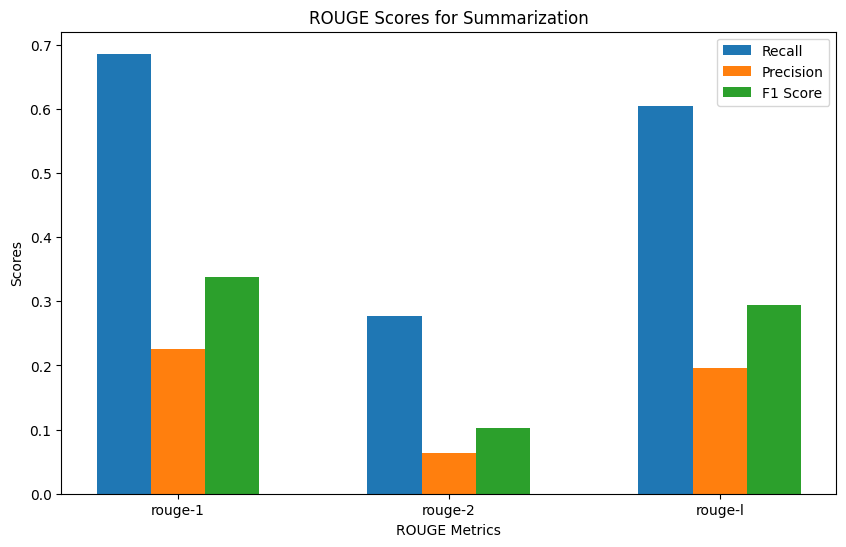

In [ ]:

scores = {
    'rouge-1': {'r': 0.6859649122807017, 'p': 0.22488821004686196, 'f': 0.3377800760898483},
    'rouge-2': {'r': 0.2774587985114301, 'p': 0.06346978557504873, 'f': 0.10289699694564351},
    'rouge-l': {'r': 0.6041666666666667, 'p': 0.19573610563657867, 'f': 0.29494116962481015}
}

rouge_types = list(scores.keys())
recall = [scores[rouge]['r'] for rouge in rouge_types]
precision = [scores[rouge]['p'] for rouge in rouge_types]
f1 = [scores[rouge]['f'] for rouge in rouge_types]

x = range(len(rouge_types))

plt.figure(figsize=(10, 6))
plt.bar(x, recall, width=0.2, label='Recall', align='center')
plt.bar([p + 0.2 for p in x], precision, width=0.2, label='Precision', align='center')
plt.bar([p + 0.4 for p in x], f1, width=0.2, label='F1 Score', align='center')

plt.xlabel('ROUGE Metrics')
plt.ylabel('Scores')
plt.title('ROUGE Scores for Summarization')
plt.xticks([p + 0.2 for p in x], rouge_types)
plt.legend()
plt.show()

# Test Model

In [ ]:

tokenizer = BertTokenizer.from_pretrained("cahya/bert2gpt-indonesian-summarization")
tokenizer.bos_token = tokenizer.cls_token
tokenizer.eos_token = tokenizer.sep_token
model_path = "/content/drive/MyDrive/results/186k-steps-model"
model = EncoderDecoderModel.from_pretrained(model_path)

ARTICLE_TO_SUMMARIZE = 'Liputan6.com, Jakarta: Tentara Nasional Indonesia hendaknya benar-benar profesional. TNI juga harus berada di atas seluruh kekuatan politik yang ada. Demikian permintaan mantan Presiden Partai Keadilan Sejahtera Hidayat Nur Wahid, di sela-sela Munas PKS, Sabtu (19/6), di Jakarta. TNI adalah alat negara yang harus netral dan berada di atas seluruh kekuatan politik yang ada. Ini untuk menjaga keamanan teritorial dan keutuhan Negara Kesatuan Republik Indonesia, kata Hidayat, seperti ditulis Antara. Menurut Hidayat, TNI baru mungkin memiliki hak pilih pada pemilu jika diatur secara konstitusional melalui perundang-undangan. Saya kira wacana TNI memiliki hak pilih dalam pemilu harus melalui pembahasan lebih lanjut di DPR, ujar anggota Komisi I DPR RI itu. Dari pembicaraan dengan pimpinan TNI, kata Hidayat, sampai saat ini TNI masih memilih belum terlibat di pemilu. Hal ini belajar dari pengalaman pada pemilu 1955, di mana TNI terlibat di pemilu sehingga terbelah pada sejumlah kekuatan politik. Kondisi ini membuat sistem keamanan nasional menjadi tidak optimal. Sebelumnya, Presiden Susilo Bambang Yudhoyono mengatakan, suatu saat TNI harus diberikan haknya untuk memberikan hak suara pada pemilu jika sudah tidak ada hambatan yang mengganggu kekompakan. Bisa tidaknya anggota TNI menggunakan hak pilihnya dalam pemilu maupun pilkada, kata Presiden, dapat ditentukan oleh undang-undang yang dibahas oleh pemerintah bersama DPR.'


input_ids = tokenizer.encode(ARTICLE_TO_SUMMARIZE, return_tensors='pt')
summary_ids = model.generate(input_ids,
            min_length=20,
            max_length=80,
            num_beams=10,
            repetition_penalty=2.5,
            length_penalty=1.0,
            early_stopping=True,
            no_repeat_ngram_size=2,
            use_cache=True,
            do_sample=True,
            temperature=0.3,
            top_k=50,
            top_p=0.95)


summary_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(summary_text)


tni adalah alat negara yang harus netral dan berada di atas seluruh kekuatan politik yang ada. ini untuk menjaga keamanan teritorial dan keutuhan negara kesatuan republik indonesia, kata hidayat nur wahid.
